#### Modelación continua y discretizada

La discretización es una "herramienta" matematica que nos permite resolver modelos continuos al transformar las ecuaciones diferenciales que estos utilizan ecuaciones lineales, dando como resultado un modelo discreto; es decir que, en lugar de representar el comportamiento de nuestro fenomeno de manera continua se realiza una interpretación puntual cada determinada unidad de tiempo. De esta forma aun cuando no obtenemos toda la información si conocemos su tendencia. 

Paqueterias utilizadas

In [23]:
using PyPlot

#### Variación de la temperatura en un tanque usando modelo continuo

De acuerdo a la información contenida en el documento "Comparación de modelos: continuo y discretizado" tenemos que los datos iniciales son:

In [24]:
m1 = 5.0 # kg/min
m2 = 4.0 #kg/min
T0 = 30.0 # °C
T1 = 20.0 # °C
V0 = 30.0 # L 
ρ = 1.0 # kg/l

1.0

Analizaremos nuestro fenomeno durante 60 min

In [25]:
tiempo = collect(1:60) # min

60-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 49
 50
 51
 52
 53
 54
 55
 56
 57
 58
 59
 60

A partir del análisis realizado al integrar la ecuación diferencial tenemos que la temperatura se encuentra definida por

In [26]:
Temperatura(t) = (1/m2)*( m2*T0 - m1*(T1-T0)*(exp((-t*m2)/(ρ*V0))-1) )

Temperatura (generic function with 1 method)

De tal forma que para encontrar el comportamiento de la temperatura a cada momento basta con realizar una sustitución. Para ello, generamos un vector vacio donde se almacenarán los datos.

In [27]:
T_list = []
for i in tiempo
    T_cal = Temperatura(i)
    append!(T_list, T_cal)
end

Finalmente gráficamos nuestros valores

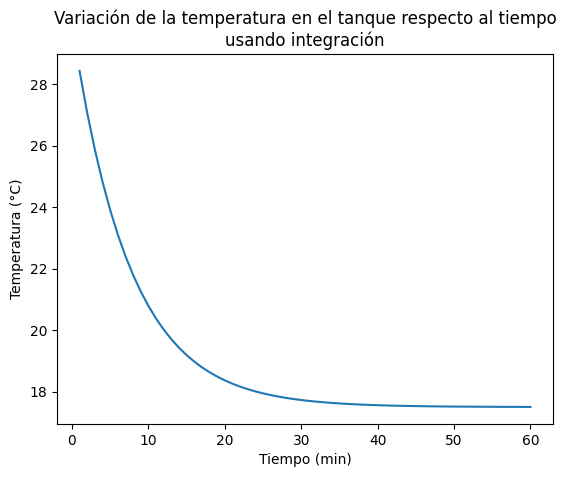

PyObject Text(24.000000000000007, 0.5, 'Temperatura (°C)')

In [28]:
title("Variación de la temperatura en el tanque respecto al tiempo\nusando integración")
plot(tiempo, T_list)
xlabel("Tiempo (min)")
ylabel("Temperatura (°C)")

#### Variación de la temperatura en un tanque usando discretización

Al discretizar el balance de masa y el balance de energia respectivamente tenemos que

In [29]:
Vt(V) = m1 - m2 + V 
Tt(V, T) = (m1*T1 + ρ*V*T)/(ρ*Vt(V) + m2)

Tt (generic function with 1 method)

Creamos una función que contenga nuestras condiciones iniciales y el tiempo de modelación. Dichos valores se introducen en los modelos discretizados y se obtiene un valor puntual hasta 60 minutos.   

In [30]:
function Discretizacion(V0, T0, tiempo)
    Vt_list = [V0]
    Tt_list = [T0]
    for i in eachindex(tiempo)
        V_cal = Vt(Vt_list[i])
        append!(Vt_list, V_cal)
        T_cal = Tt(Vt_list[i], Tt_list[i])
        append!(Tt_list, T_cal)
    end
    return Vt_list, Tt_list
end

Discretizacion (generic function with 1 method)

Al final obtenemos dos vectores que contienen los datos de volumen y temperatura en el tanque a cada instante.

In [31]:
Vt_list, Tt_list = Discretizacion(V0, T0, tiempo)

([30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0  …  81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0], [30.0, 28.571428571428573, 27.380952380952383, 26.383526383526384, 25.54358870148344, 24.832872201293256, 24.2287631761316, 23.71306034977409, 23.271029355753363, 22.890677105084368  …  20.084830222943648, 20.07989823323762, 20.0753063807527, 20.071027609119025, 20.067037293999977, 20.06331299988887, 20.059834263631238, 20.056582401477364, 20.053540336881806, 20.050692446622136])

Solo queda generar los gráficos correspondientes

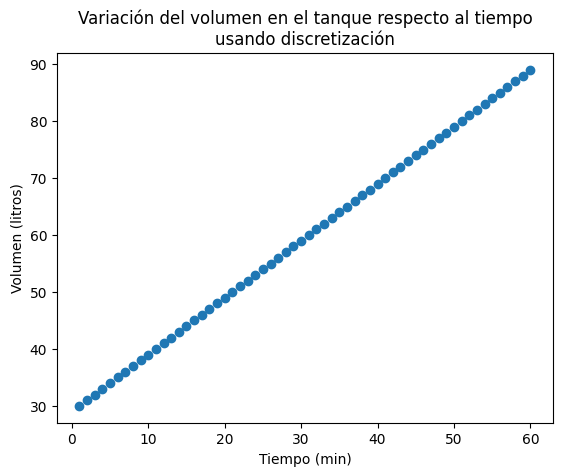

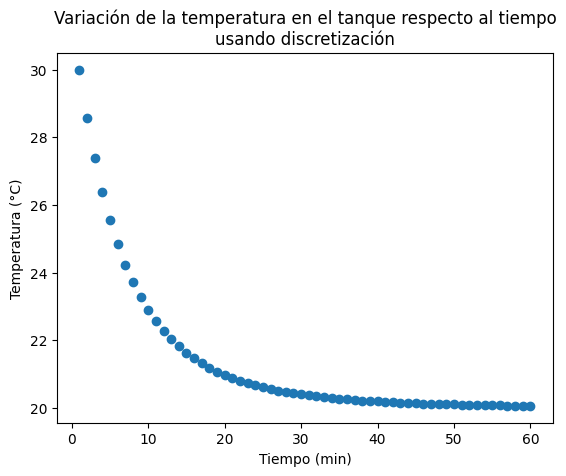

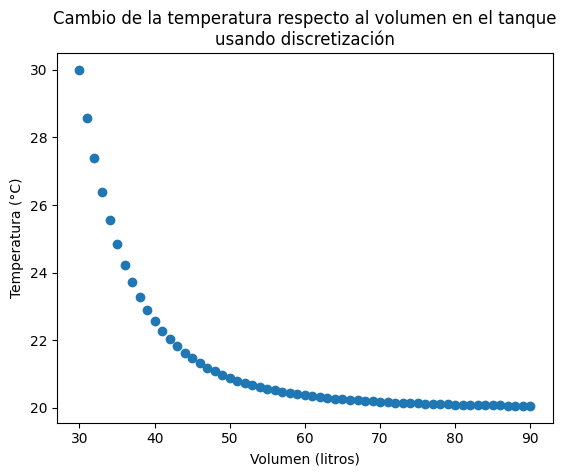

PyObject Text(24.000000000000007, 0.5, 'Temperatura (°C)')

In [32]:
figure(2)
title("Variación del volumen en el tanque respecto al tiempo\nusando discretización")
scatter(tiempo, Vt_list[1:60]) 
xlabel("Tiempo (min)")
ylabel("Volumen (litros)")

figure(3)
title("Variación de la temperatura en el tanque respecto al tiempo\nusando discretización")
scatter(tiempo, Tt_list[1:60])
xlabel("Tiempo (min)")
ylabel("Temperatura (°C)")

figure(4)
title("Cambio de la temperatura respecto al volumen en el tanque\nusando discretización")
scatter(Vt_list, Tt_list)
xlabel("Volumen (litros)")
ylabel("Temperatura (°C)")

#### Variación de la concentración y contenido en un tanque usando modelo discreto

Datos del problema

In [33]:
# Corrientes de entrada
m1 = 7 # kg/min
m2 = 10 # kg/min
x1 = 0.1
x2 = 0.2

# Salida
m3 = 15 # kg/min

# Condiciones iniciales 
x0 = 0.3
M0 = 20 # kg

# Limite de llenado del tanque
Mf = 45 # kg 

45

Tiempo de modelado

In [34]:
# tiempo = (Mf - M0)/2
tiempo = collect(1:13)

13-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13

Modelos discretizados del balance general y el balance de la especie

In [35]:
Mt(M) = m1 + m2 - m3 + M
xt(M, x) = (m1*x1 + m2*x2 + M*x)/(m3 + Mt(M))

xt (generic function with 1 method)

Función para solución

In [36]:
function Tanque(M0, x0)
    Mt_list = [M0] 
    xt_list = [x0]
    for i in tiempo
        M_cal = Mt(Mt_list[i])
        append!(Mt_list, M_cal)
        x_cal = xt(Mt_list[i], xt_list[i])
        append!(xt_list, x_cal)
    end
    return Mt_list, xt_list
end

Tanque (generic function with 1 method)

Vectores con valores de llenado y concentración

In [37]:
Mt_list, xt_list = Tanque(M0, x0)

([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46], [0.3, 0.23513513513513512, 0.20187110187110188, 0.1840221084123523, 0.17405987950514326, 0.16830392502542246, 0.16487484576090797, 0.16277540947651134, 0.1614581161215958, 0.1606130600071217, 0.16005993236855684, 0.1596911806095136, 0.15944117941694186, 0.15926904744828593])

Gráfico

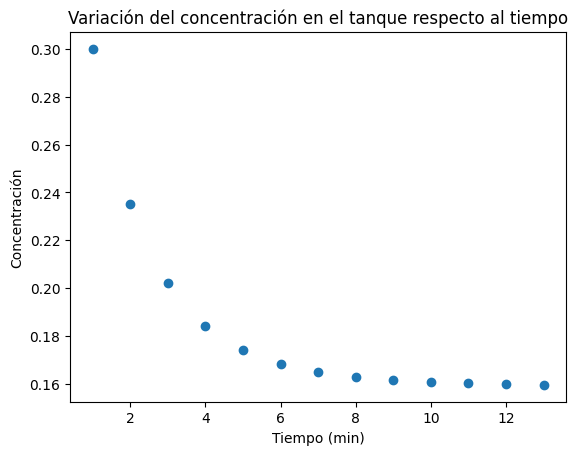

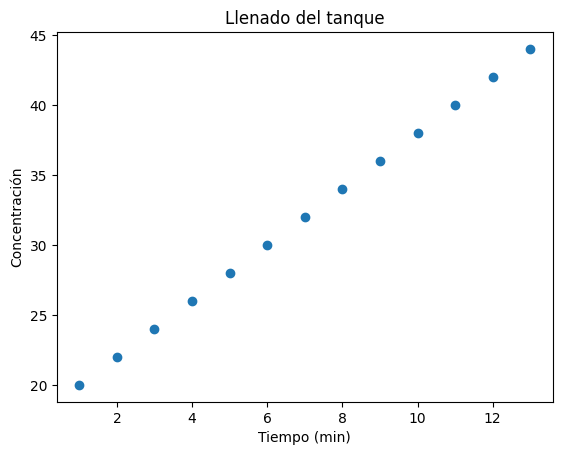

PyObject Text(24.000000000000007, 0.5, 'Concentración')

In [38]:
figure(1)
title("Variación del concentración en el tanque respecto al tiempo")
scatter(tiempo, xt_list[1:13]) 
xlabel("Tiempo (min)")
ylabel("Concentración")

figure(2)
title("Llenado del tanque")
scatter(tiempo, Mt_list[1:13]) 
xlabel("Tiempo (min)")
ylabel("Concentración")